In [6]:
%pylab inline 
%load_ext autoreload
%autoreload 2

import numpy as np 
import random
np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/kaustubh.n/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
ROCK, PAPER, SCISSORS = 0,1,2
NUM_ACTIONS = 3
regretSum = np.zeros(NUM_ACTIONS)
strategySum = np.zeros(NUM_ACTIONS)
oppStrategy = np.array([0.4, 0.3, 0.3])
def value(p1, p2):
    if p1 == p2:
        return 0
    elif p1 == ROCK and p2 == SCISSORS:
        return 1
    elif p1 == SCISSORS and p2 == PAPER:
        return 1
    elif p1 == PAPER and p2 == ROCK:
        return 1
    else:
        return -1

In [8]:
# accumulates in strategy sum 
def getStrategy():
    global regretSum, strategySum
    strategy = np.maximum(regretSum, 0)
    normalisingSum = np.sum(strategy)
    if normalisingSum > 0:
        strategy /= normalisingSum
    else:
        strategy = np.ones(NUM_ACTIONS)/NUM_ACTIONS
    strategySum += strategy
    return strategy

# use strategy sum 
def getAverageStrategy():
    global strategySum
    normalisingSum = np.sum(strategySum)
    if normalisingSum > 0:
        avgStrategy = strategySum/normalisingSum
    else:
        avgStrategy = np.ones(NUM_ACTIONS)/NUM_ACTIONS
    return avgStrategy

def getAction(strategy):
    rr = random.random()
    return np.searchsorted(np.cumsum(strategy), rr)

In [9]:
def train(iterations):
    global regretSum
    actionUtility = np.zeros(NUM_ACTIONS)
    for i in range(iterations):
        strategy = getStrategy()
        myAction = getAction(strategy)
        otherAction = getAction(oppStrategy)
        
        actionUtility[otherAction] = 0
        actionUtility[(otherAction + 1) % NUM_ACTIONS] = 1
        actionUtility[(otherAction - 1) % NUM_ACTIONS] = -1
        
        regretSum += actionUtility - actionUtility[myAction]

        
train(100000)

([<matplotlib.lines.Line2D at 0x112ddaa90>], 98.41)

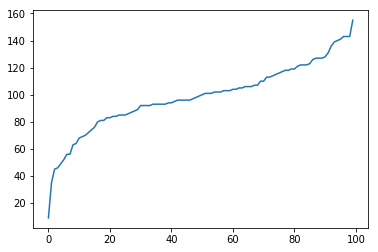

In [11]:
vvv = []
for j in range(100):
    vv = 0
    for i in range(1000):    
#         strategy = getStrategy()
#       this is probably what we will convege to 
#       strategy = np.array([0, 1, 0]) 
        strategy = getAverageStrategy()
        myAction = getAction(strategy)
        otherAction = getAction(oppStrategy)
        vv += value(myAction, otherAction)
    vvv.append(vv)
# plt.hist(vvv, bins=10)
plot(sorted(vvv)), np.mean(vvv)

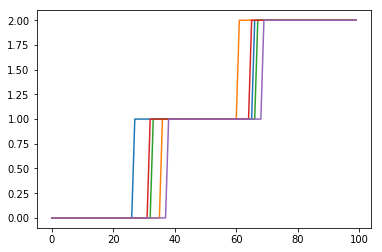

In [27]:
for j in range(5):
    a = [getAction(getStrategy()) for i in range(100)]
    plot(sorted(a))